In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import utils
import utils_SEM
import pickle
from scipy.optimize import minimize

In [2]:
filename = 'data/forAbhi/Velocity_MeanSEM.mat'
data = scipy.io.loadmat(filename)
T4_arclight_gratings_mean = data['Arcmean'][10:,[16,17,18,19,40,41,42,43]] #taking PD(120deg) and ND(300deg) data
T4_arclight_gratings_sem = data['ArcSE'][10:,[16,17,18,19,40,41,42,43]] #taking PD(120deg) and ND(300deg) data

T4_gcamp_gratings_mean = data['Gmean'][10:,[16,17,18,19,40,41,42,43]] #taking PD(120deg) and ND(300deg) data
T4_gcamp_gratings_sem = data['GSE'][10:,[16,17,18,19,40,41,42,43]] #taking PD(120deg) and ND(300deg) data

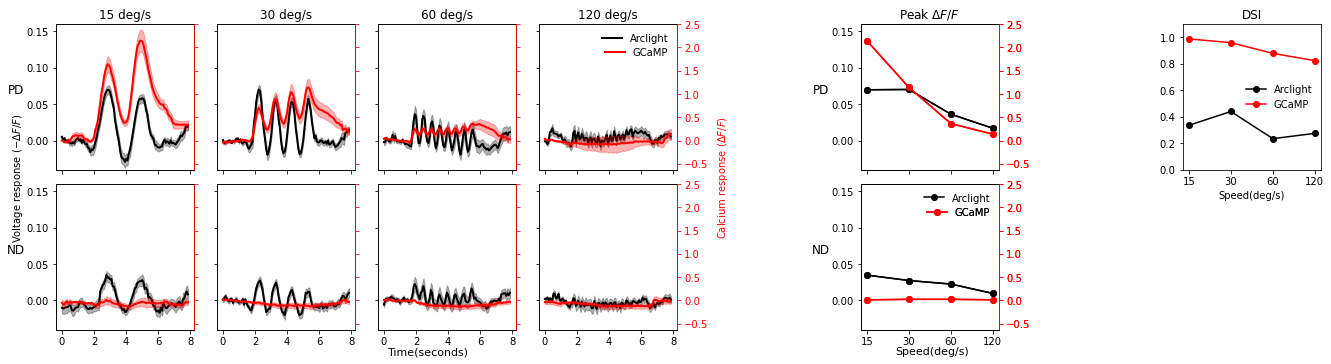

In [62]:
utils_SEM.plot_twinaxis([T4_arclight_gratings_mean, T4_gcamp_gratings_mean],
                                [T4_arclight_gratings_sem, T4_gcamp_gratings_sem], 
                               fig_size=(20,5), ylim1=(-0.04,0.10),ylim2=(-0.20,2.50), 
                                savefig=True, title='Gratings_SpeedPDND_withSEM')

In [5]:
speed=[15,30,60,120]
n = len(speed)
data_list = [T4_arclight_gratings_mean, T4_gcamp_gratings_mean]
peak_tuning = np.empty((len(data_list),len(speed)*2))
for i in range(len(data_list)):
    peak_tuning[i,:] = data_list[i].max(axis=0)

In [6]:
peak_tuning

array([[0.06979957, 0.07019595, 0.03623655, 0.01683864, 0.03476884,
        0.02732259, 0.02247257, 0.00958857],
       [2.14412245, 1.14137008, 0.36462089, 0.13627533, 0.01230288,
        0.02341801, 0.02348549, 0.01313915]])

In [7]:
dsi = np.empty((len(data_list), len(speed)))

In [8]:
dsi.shape

(2, 4)

In [9]:
for i in range(peak_tuning.shape[0]):
    for j in range(n):
        PD = peak_tuning[i,j]
        ND = peak_tuning[i,j+4]
        dsi[i,j] = (PD-ND) / (PD+ND)

In [10]:
dsi

array([[0.33500293, 0.4396431 , 0.23444377, 0.27434096],
       [0.98858956, 0.9597901 , 0.87897394, 0.82412481]])

In [12]:
pd = 0.06979957
nd = 0.03476884
(pd-nd)/(pd+nd)

0.33500298990871147

In [13]:
print(dsi)

[[0.33500293 0.4396431  0.23444377 0.27434096]
 [0.98858956 0.9597901  0.87897394 0.82412481]]


In [19]:
dsi[0,:]

array([0.33500293, 0.4396431 , 0.23444377, 0.27434096])